In [25]:
!curl -o /tmp/stackex.txt https://raw.githubusercontent.com/Raphtory/Data/main/stackex.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4519k  100 4519k    0     0  4727k      0 --:--:-- --:--:-- --:--:-- 4722k


In [26]:
import pandas as pd
from pyraphtory.context import PyRaphtory
from pyraphtory.input import ImmutableString
from pyraphtory.input import GraphBuilder
from pyraphtory.spouts import FileSpout
from pyraphtory.sources import CSVEdgeListSource
from pyraphtory.sources import Source
from pyraphtory.graph import Row

structure_file = "/tmp/stackex.txt"

ctx = PyRaphtory.local()

In [28]:
graph = ctx.new_graph()

with open(structure_file, 'r') as file :
  for line in file.readlines():
      row = line.split(" ")
      graph.add_edge(int(row[2]),int(row[0]),int(row[1]))




In [32]:
windows = [86400, 604800, 2592000, 15780000]

df_nodes = graph \
    .walk(1578000000) \
    .window(windows) \
    .execute(ctx.algorithms.generic.NodeEdgeCount)\
    .to_df(["nodes", "edges_dir", "edges_undir", "temporal_edges"])

In [33]:
df_nodes.tail(20)

,timestamp,window,nodes,edges_dir,edges_undir,temporal_edges
500,Wed Dec 30 05:16:52 GMT 2015,15780000,28,15,15,15
501,Wed Dec 30 05:16:52 GMT 2015,2592000,3,2,2,2
502,Wed Dec 30 05:16:52 GMT 2015,604800,0,0,0,0
503,Wed Dec 30 05:16:52 GMT 2015,86400,0,0,0,0
504,Sun Jan 17 11:36:52 GMT 2016,15780000,18,11,11,11
505,Sun Jan 17 11:36:52 GMT 2016,2592000,3,2,2,2
506,Sun Jan 17 11:36:52 GMT 2016,604800,0,0,0,0
507,Sun Jan 17 11:36:52 GMT 2016,86400,0,0,0,0
508,Thu Feb 04 17:56:52 GMT 2016,15780000,22,12,12,12
509,Thu Feb 04 17:56:52 GMT 2016,2592000,6,3,3,3


TypeError: an integer is required (got type str)

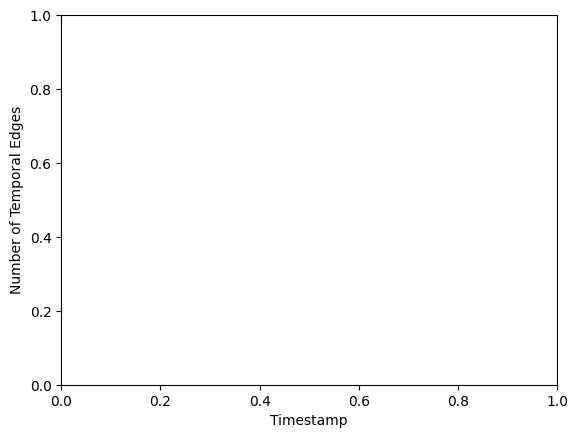

In [7]:
import matplotlib.pyplot as plt
import datetime as dt

fig, ax = plt.subplots()
ax.set_xlabel("Timestamp")
ax.set_ylabel("Number of Temporal Edges")

for window in windows:
    df_sub = df_nodes[df_nodes["window"] == window]
    dates = df_sub["timestamp"].apply(dt.datetime.fromtimestamp)
    ax.plot(dates, df_sub.temporal_edges, label = "window size "+str(window))

ax.legend(loc= "upper left")
plt.show()

In [ ]:
from pyraphtory.scala.implicits.numeric import Long

df_community = graph \
    .execute(ctx.algorithms.generic.community.LPA[Long]())\
    .to_df(["name", "community"])

In [ ]:
df_clustering = graph \
    .walk(86400) \
    .window(windows) \
    .execute(ctx.algorithms.generic.motif.GlobalClusteringCoefficient)\
    .to_df(["avgCluster", "globalCluster"])

In [ ]:
df_clustering.tail()

In [ ]:
import matplotlib.pyplot as plt
import datetime as dt

fig, ax = plt.subplots()
ax.set_xlabel("Timestamp")
ax.set_ylabel("Average Clustering Coefficient")

for window in windows:
    df_sub = df_clustering[df_clustering["window"] == window]
    dates = df_sub["timestamp"].apply(dt.datetime.fromtimestamp)
    ax.plot(dates, df_sub.avgCluster, label = "window size "+str(window))

ax.legend(loc= "upper left")
plt.show()